# Perceptron

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [2]:
iris = load_iris()
X = iris.data[:,[2,3]]
y = iris.target

## Preprocessing the data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019)

In [4]:
sc = StandardScaler()
X_std = sc.fit_transform(X)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Training a Perceptron

In [5]:
per = Perceptron(max_iter=100000, penalty='l2', alpha=0.0001, random_state=2019)
per.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=100000, n_iter_no_change=5, n_jobs=None,
           penalty='l2', random_state=2019, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

## Metrics

In [6]:
y_pred = per.predict(X_test_std)

In [7]:
print(f'Accuracy: {accuracy_score(y_test, y_pred): .2f}')

Accuracy:  0.96


In [8]:
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')

Confusion Matrix:
 [[19  0  0]
 [ 0  9  1]
 [ 0  1 15]]


In [9]:
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.90      0.90      0.90        10
           2       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [10]:
cross_val_score(per, X_std, y, cv=10)

array([1.        , 1.        , 0.86666667, 0.86666667, 0.86666667,
       0.86666667, 0.86666667, 0.66666667, 0.86666667, 0.86666667])

## Plotting Decision Boundaries

In [11]:
import Plotting_Decision_Boundaries as pdb

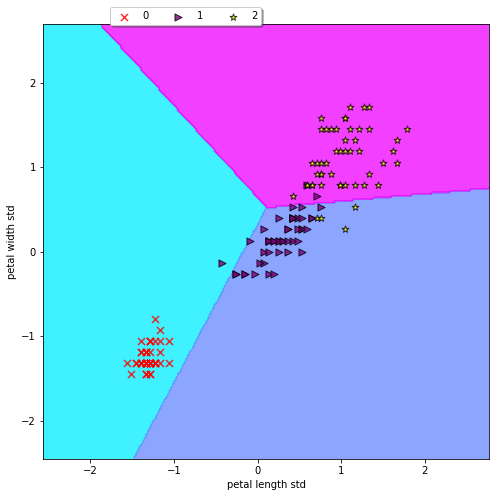

In [12]:
pdb.plotting_db(X=X_std,y=y,classifier=per)

## Reference:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html